In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import pandas as pd

In [2]:
edge_list = [(0,2), (0,1), (0,3), (2,4), (5,6), (7,4), (0,6), (5,3), (3,7), (0,8)]
goal = 7

In [3]:
G = nx.Graph()
G.add_edges_from(edge_list)
position = nx.spring_layout(G)


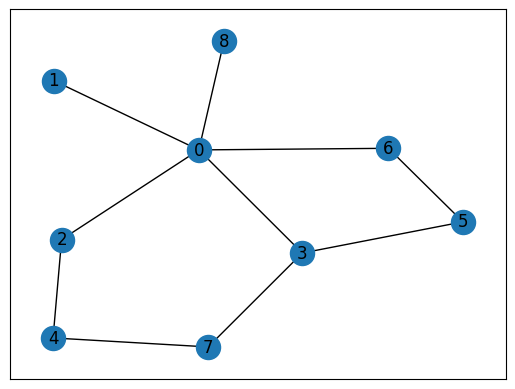

In [4]:
nx.draw_networkx_nodes(G, position)
nx.draw_networkx_edges(G, position)
nx.draw_networkx_labels(G, position)
plt.show()

In [6]:
SIZE_MATRIX = 9
R = np.matrix(np.ones(shape=(SIZE_MATRIX, SIZE_MATRIX)))
R *= -1

In [8]:
for edge in edge_list:
    if edge[1] == goal:
        R[edge]=100
    else:
        R[edge]=0
    if edge[0] == goal:
        R[edge[::-1]] = 100
    else:
        R[edge[::-1]] = 0
        

In [10]:
R[goal,goal]=100

In [11]:
R

matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,   0.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [12]:
gamma = 0.8
Q = np.matrix(np.zeros([SIZE_MATRIX,SIZE_MATRIX]))
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def get_available_actions(state):
    current_state_row = R[state,]
    available_actions = np.where(current_state_row>=0)[1]
    return available_actions

In [14]:
def sample_next_action(available_actions):
    next_action = int(np.random.choice(available_actions, size=1))
    return next_action

In [15]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,]==np.max(Q[action,]))[1]
    print('max_index', max_index.shape)
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action,max_index]
    Q[current_state, action] = R[current_state,action] + gamma*max_value
    print('max_value', R[current_state, action]+ gamma*max_value)
            

In [17]:
initial_state = 0
available_actions = get_available_actions(initial_state)
print(available_actions)

[1 2 3 6 8]


In [18]:
action = sample_next_action(available_actions)
print(action)

3


In [19]:
update(initial_state, action, gamma)

max_index (9,)
max_value 0.0


In [22]:
for i in range(700):
    current_state = np.random.randint(0,int(Q.shape[0]))
    available_actions = get_available_actions(current_state)
    action = sample_next_action(available_actions)
    update(current_state, action, gamma)

max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (8,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (8,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (1,)
max_value 80.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 80.0
max_index (1,)
max_value 64.0
max_index (1,)
max_value 80.0
max_index (1,)
max_value 64.0
max_index (1,)
max_value 64.0
max_index (1,)
max_value 64.0
max_index (1,)
max_value 64.0
max_index (1,)
max_value 64.0
max_index (1,)
max_value 180.0
max_index (1,)
max_value 144.0
max_index (1,)
max_value 115.2
max_index (1,)
max_value 92.16000000000001
max_in

In [24]:
pd.DataFrame(Q/np.max(Q)*100)

,0,1,2,3,4,5,6,7,8
0,0.000000,51.150436,63.866633,79.922557,0.000000,0.000000,51.093306,0.000000,51.053633
1,63.938046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,63.938046,0.000000,0.000000,0.000000,79.954296,0.000000,0.000000,0.000000,0.000000
3,63.938046,0.000000,0.000000,0.000000,0.000000,63.938046,0.000000,99.903196,0.000000
4,0.000000,0.000000,63.963437,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
5,0.000000,-0.200203,0.000000,79.922557,0.000000,0.000000,51.150436,0.000000,0.000000
6,63.817041,0.000000,0.000000,0.000000,0.000000,63.938046,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,79.922557,80.000000,0.000000,0.000000,99.974609,0.000000
8,63.938046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
current_state=0
steps = [current_state]
while current_state !=7:
    next_step_index = np.where(Q[current_state,]==np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index), size=1)
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

In [26]:
print("most efficient path")
print(steps)

most efficient path
[0, 3, 7]
